# CAPSTONE 2

## Probelm statement:

### *Step 1*: Importing the libreries that are needed - Pandas, Numpy, Seaborn and Matplotlib

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,5)
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import datetime

### *Step 2*: Importing dataframes and string them into their individual dataframes

In [4]:
nov2019 = pd.read_csv('2019-Nov.csv', index_col=False)
dec2019 = pd.read_csv('2019-Dec.csv', index_col=False)
jan2020 = pd.read_csv('2020-Jan.csv', index_col=False)

### *Step 3*: Merging all dataframes into one dataframe and printing it .info() and .describe()

In [5]:
alldata = pd.concat([nov2019,dec2019,jan2020])
print(alldata.info(), alldata.price.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12433875 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 948.6+ MB
None count    1.243388e+07
mean     8.537646e+00
std      1.939595e+01
min     -7.937000e+01
25%      2.060000e+00
50%      4.000000e+00
75%      6.980000e+00
max      3.277800e+02
Name: price, dtype: float64


### *Step 4*: Cleaning the data - removing NULL values and Category Code column (partial data)

In [6]:
# Removing Category Code column
alldata1 = alldata.drop(columns = 'category_code')
print (alldata1.info())

# Removing rows with NULL values (in any column)
alldata_1 = alldata1.dropna()
print (alldata_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12433875 entries, 0 to 4264751
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   int64  
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 853.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160072 entries, 2 to 4264746
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   int64  
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 491.6+ MB
None


### *Step 5*: Understanding the users
In this step I will answer the following question, to get a better indersatnding of the data::
1. How many unique users baught cosmetics online?
2. What are the Daily Active Users (DAU)?
3. Who were the top 5 users during this five month period of time and how much did they spend in total?
4. What are the different event types and how often do they happen? 
5. **Funnel**- what is the funnel process looks like?

1. Count of unique user_id

In [7]:
unique_users= alldata_1['user_id'].nunique()
print("There are "+ str(unique_users) + " unique users in this five months period")

There are 751361 unique users in this five months period


2. DAU - Daily Active Users

In [9]:
import datetime
pd.set_option('mode.chained_assignment', None)
# Switching event_time from an object to a datetime type:
alldata_1['event_time'] = pd.to_datetime(alldata_1['event_time'])
# Extract the date from the datetime:
alldata_1['date'] = alldata_1['event_time'].dt.date
# Calculating Daily Active Users:
alldata_1.groupby('date')['user_id'].nunique()

date
2019-11-01    10736
2019-11-02    10598
2019-11-03    11156
2019-11-04    11649
2019-11-05    12925
              ...  
2020-01-27    16483
2020-01-28    15689
2020-01-29    15515
2020-01-30    15533
2020-01-31    16113
Name: user_id, Length: 92, dtype: int64

3. Top five (purchasing) users and the span of their purchases

           len
user_id       
493840329  224
556579890  221
514908450  206
539636703  190
575709540  188


Text(0.5, 1.0, 'Total Money Spent By Top Users')

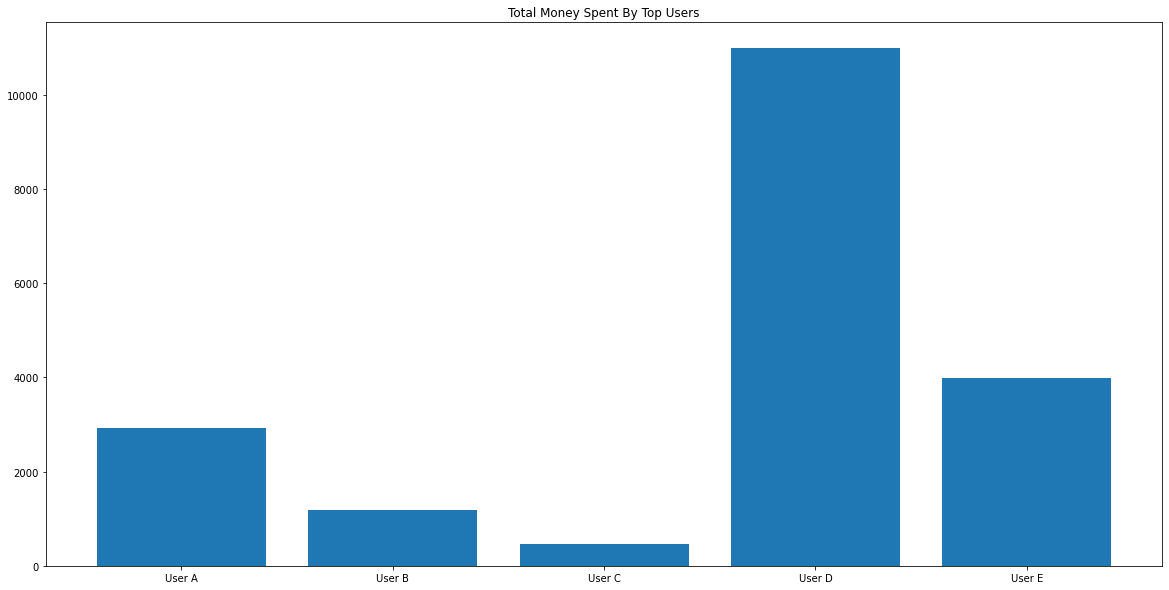

In [11]:
# First I will get all the purchased events
only_purchase = alldata_1.loc[alldata_1.event_type == 'purchase']
# Then I will get the purchases with the unique user IDs that are tied to them (and not null)
purchase_users = only_purchase.loc[only_purchase.user_id.notnull()]
# Then I could get the top 5 users:
top_users = purchase_users.groupby('user_id').user_id.agg([len]).sort_values(by='len', ascending=False)
print(top_users.head(5))
# Now I created a variable for each of the top 5 users to get the total that they spent:
user_a = alldata_1.loc[alldata_1.user_id == 493840329].price.sum()
user_b = alldata_1.loc[alldata_1.user_id == 556579890].price.sum()
user_c = alldata_1.loc[alldata_1.user_id == 514908450].price.sum()
user_d = alldata_1.loc[alldata_1.user_id == 539636703].price.sum()
user_e = alldata_1.loc[alldata_1.user_id == 575709540].price.sum()
y1= [user_a,user_b,user_c,user_d,user_e]
x1= ['User A', 'User B', 'User C', 'User D', 'User E']
mpl.rcParams['figure.figsize'] = (20,10)
plt.bar(x1,y1)
plt.title('Total Money Spent By Top Users')

4. Event types and how often they occured

view                3418751
cart                1927094
remove_from_cart    1356184
purchase             458043
Name: event_type, dtype: int64 7160072


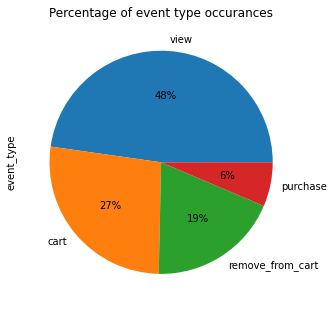

In [12]:
e_types = alldata_1["event_type"].value_counts()
mpl.rcParams['figure.figsize'] = (5,10)
print(e_types, e_types.sum())
e_types.plot.pie(title= 'Percentage of event type occurances', autopct='%1.0f%%')

5. Funnel process

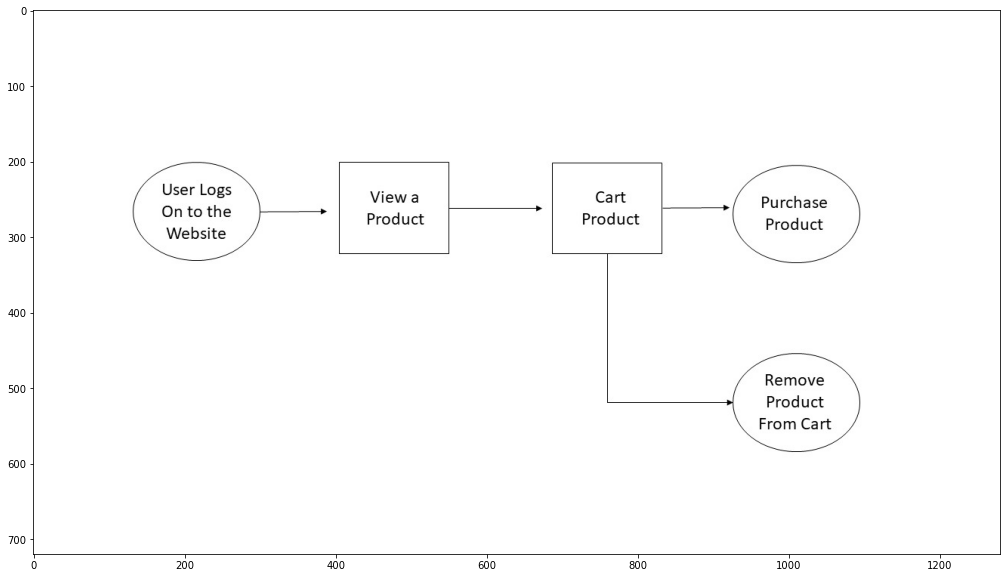

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
mpl.rcParams['figure.figsize'] = (20,10)
img = mpimg.imread('C:/Users/Shira/Desktop/SpringBoard/Capstone2/flowchart.jpg')
imgplot = plt.imshow(img)

### *Step 6*: Understanting the market
In this step I will answer the following questions, to get a better indersatnding of the data:
1. What was the monthly revenue from selling cosmetics each month?
2. Which were the top 5 brands sold in this five months period of time?
3. Which brands sold the least in this five months period of time?

1. Monthly revenue

Text(0.5, 1.0, 'Monthly Reveneu Comperison (in millions)')

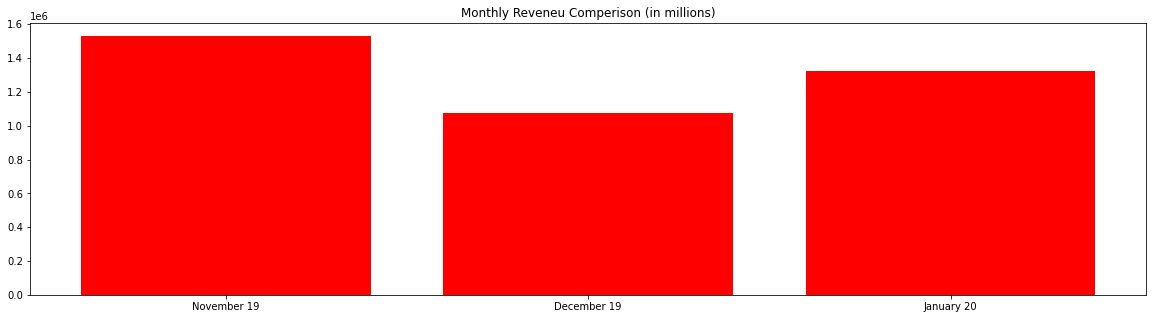

In [13]:
# First I make sure I will include only the events that showed a purchase:
nov19_purchase = nov2019.loc[nov2019.event_type == 'purchase']
dec19_purchase = dec2019.loc[dec2019.event_type == 'purchase']
jan20_purchase = jan2020.loc[jan2020.event_type == 'purchase']
# Then I will get the sum of price for each month and give it a variable (and limit it to 2 decimals):
November19 = round(nov19_purchase.price.sum(),2)
December19 = round(dec19_purchase.price.sum(),2)
January20 = round(jan20_purchase.price.sum(),2)
# Then I will plot it as a bar chart:
y = [November19, December19, January20]
x= ['November 19', 'December 19', 'January 20']
mpl.rcParams['figure.figsize'] = 20,5
plt.bar(x,y, color='red')
plt.title('Monthly Reveneu Comperison (in millions)')

2. Top 5 brands

In [14]:
# First I will get only the events that showed a purchase:
only_purchase = alldata_1.loc[alldata_1.event_type == 'purchase']
# Then I will get the pruchases that had a brand tied to them:
purchases_brands = only_purchase.loc[only_purchase.brand.notnull()]
# Then I could get the top 5 brands:
top_five_brands = purchases_brands.groupby('brand').brand.agg([len]).sort_values(by='len', ascending=False)
top_five_brands.head(5)

,len
brand,
runail,70794
irisk,41778
grattol,33612
masura,30700
bpw.style,24175


3. The 10 brands that sold the least

In [15]:
bottom_five_brands = purchases_brands.groupby('brand').brand.agg([len]).sort_values(by='len', ascending=True)
bottom_five_brands.head(10)

,len
brand,
sun,1
helloganic,1
andrea,2
esquire,2
gezatone,3
neoleor,3
frozen,3
kondor,3
weaver,3


### *Step 6*: Convert the dataframe into a CSV file for further analysis in Tableau

In [16]:
alldata_1.to_csv('capstone_2.csv')

In [17]:
testing = pd.read_csv('capstone_2.csv', index_col=False)
print(testing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160072 entries, 0 to 7160071
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   event_time    object 
 2   event_type    object 
 3   product_id    int64  
 4   category_id   int64  
 5   brand         object 
 6   price         float64
 7   user_id       int64  
 8   user_session  object 
 9   DATE          object 
 10  date          object 
dtypes: float64(1), int64(4), object(6)
memory usage: 600.9+ MB
None
